Referenced: 

https://www.codepasta.com/computer-vision/2016/11/06/background-segmentation-removal-with-opencv.html

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


shape of image: (536, 460, 3)
dtype of image: uint8
shape of blurredimage: (536, 460, 3)
dtype of blurredimage: uint8


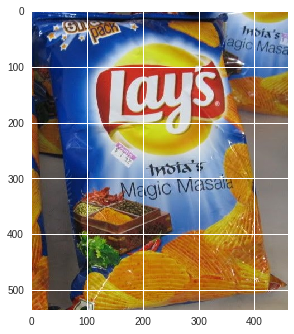

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


img = cv2.imread('/content/gdrive/My Drive/E4Colaboratory/lays masala magic.502.jpg')

print("shape of image: {}".format(img.shape))
print("dtype of image: {}".format(img.dtype))

blurred = cv2.GaussianBlur(img, (5, 5), 0) # Remove noise
print("shape of blurredimage: {}".format(blurred.shape))
print("dtype of blurredimage: {}".format(blurred.dtype))

plt.imshow(img[...,::-1])

plt.show()



In [0]:
def edgedetect (channel):
    sobelX = cv2.Sobel(channel, cv2.CV_16S, 1, 0)
    sobelY = cv2.Sobel(channel, cv2.CV_16S, 0, 1)
    sobel = np.hypot(sobelX, sobelY)

    sobel[sobel > 255] = 255; # Some values seem to go above 255. However RGB channels has to be within 0-255
    return sobel

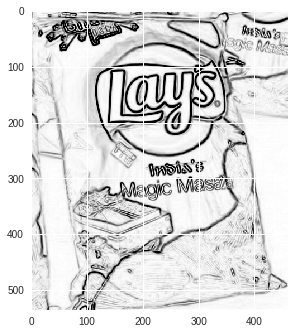

In [4]:
# print(blurred[:,:, 0])
# print("-----")

# print(blurred[:,:, 1])
# print("-----")

# print(blurred[:,:, 2])
# print("-----")

edgeImg = np.max( np.array([ edgedetect(blurred[:,:, 0]), edgedetect(blurred[:,:, 1]), edgedetect(blurred[:,:, 2]) ]), axis=0 )

plt.imshow(edgeImg)

plt.show()

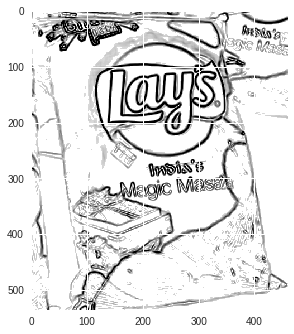

In [5]:
mean = np.mean(edgeImg);
edgeImg[edgeImg <= mean] = 0;
plt.imshow(edgeImg)

plt.show()

In [0]:
def findSignificantContours (img, edgeImg):
    image, contours, heirarchy = cv2.findContours(edgeImg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Find level 1 contours
    level1 = []
    for i, tupl in enumerate(heirarchy[0]):
        # Each array is in format (Next, Prev, First child, Parent)
        # Filter the ones without parent
        if tupl[3] == -1:
            tupl = np.insert(tupl, 0, [i])
            level1.append(tupl)
    # From among them, find the contours with large surface area.
    significant = []
    tooSmall = edgeImg.size * 5 / 100 # If contour isn't covering 5% of total area of image then it probably is too small
    for tupl in level1:
        contour = contours[tupl[0]];
        area = cv2.contourArea(contour)
        if area > tooSmall:
            significant.append([contour, area])

            # Draw the contour on the original image
#             cv2.drawContours(img, [contour], 0, (0,255,0),2, cv2.LINE_AA, maxLevel=1)

    significant.sort(key=lambda x: x[1])
    #print ([x[1] for x in significant]);
    return [x[0] for x in significant];

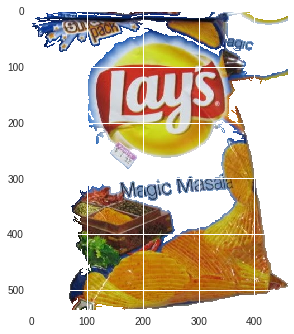

In [7]:
edgeImg_8u = np.asarray(edgeImg, np.uint8)

# Find contours
significant = findSignificantContours(img, edgeImg_8u)
mask = edgeImg.copy()
mask[mask > 0] = 0
cv2.fillPoly(mask, significant, 255)
# Invert mask
mask = np.logical_not(mask)

#Finally remove the background
img[mask] = 255;
plt.imshow(img[...,::-1])

plt.show()